# To find a better Neighborhood places for people while Migration.

## 1. Importing required Python Libraries

In [13]:
import numpy as np
import pandas as pd
import requests
import geocoder
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import bs4 as bs
%matplotlib inline
import json
import xml
import folium
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup

## 2. Data Extraction and Preprocessing

In [14]:
link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
src = requests.get(link)
sp = bs.BeautifulSoup(src.content, 'lxml')
tl = sp.find_all('table')[0]
df = pd.read_html(str(tl))
dt = pd.read_json(df[0].to_json(orient='records'))
dt.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [15]:
# cleaning the Data
dt1 = dt[dt["Borough"] != 'Not assigned']
dt1 = dt1.groupby(['Borough', 'Postal Code'], as_index = False).agg(','.join)
dt1.head()

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [23]:
dt1.shape

(103, 3)

In [17]:
gl = "https://cocl.us/Geospatial_data"
gd = pd.read_csv(gl)
gd.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [18]:
gd.columns = ['Postal Code', 'Latitude', 'Longitude']
gd.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [19]:
fd = pd.merge(dt1, gd, on = 'Postal Code')
fd.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


## 3. Map

In [35]:

lcl = fd[['Latitude', 'Longitude']]
lclist = lcl.values.tolist()
m = folium.Map(location=[fd['Latitude'][0], fd['Longitude'][0]], zoom_start=12)
for point in range(0,len(lclist)):
    folium.Marker(lclist[point], popup=fd['Neighbourhood'][point]).add_to(m)
m

In [36]:
fd['coordinates'] = fd['coordinates'].apply(Point)
geof = gpd.GeoDataFrame(fd, geometry='coordinates')
geof.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.72802 -79.38879)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.71275 -79.39020)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.71538 -79.40568)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.70432 -79.38879)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.68957 -79.38316)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


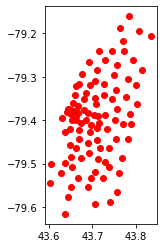

## FourSquare API

In [39]:
# The code was removed by Watson Studio for sharing.

In [40]:
VERSION = '20180604'
LIMIT = 30

In [41]:
address = 'Scarborough'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

54.2820009 -0.4011868


In [48]:
search_query = 'Shop'
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UQ1DYIB14W3CYCY0WZGXHTMK1C0UA01YP3QKCV4DKIMBV3XO&client_secret=KZVHN0T0JZMFWTAHSM4UNZXNEZNT2O5SV3U0UDHN4PVSIB0J&ll=54.2820009,-0.4011868&v=20180604&query=Shop&radius=500&limit=30'

In [49]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb668d34450ba020ed66a21'},
 'response': {'venues': [{'id': '4cd81ac38f949eb05f2075ae',
    'name': 'O2 Shop Scarborough',
    'location': {'address': 'Unit 5 The Brunswick Centre',
     'lat': 54.28081710984129,
     'lng': -0.40241210845462383,
     'labeledLatLngs': [{'label': 'display',
       'lat': 54.28081710984129,
       'lng': -0.40241210845462383}],
     'distance': 153,
     'postalCode': 'YO11 1UE',
     'cc': 'GB',
     'city': 'Scarborough',
     'state': 'North Yorkshire',
     'country': 'United Kingdom',
     'formattedAddress': ['Unit 5 The Brunswick Centre',
      'Scarborough',
      'North Yorkshire',
      'YO11 1UE',
      'United Kingdom']},
    'categories': [{'id': '4f04afc02fb6e1c99f3db0bc',
      'name': 'Mobile Phone Shop',
      'pluralName': 'Mobile Phone Shops',
      'shortName': 'Mobile Phones',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mobilephoneshop_',
       'suffix': '.png'},
     

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


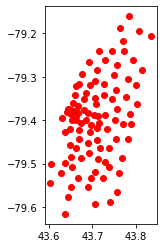

In [47]:
cty = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
axis = cty[cty.name == "Toronto"].plot(color='green', edgecolor='black')
geof.plot(ax=axis, color='red')
plt.show()

### Conclusion :

In this project, using foursquare API we find out the better neighbourhoods for  migrating peoples with various venue ratings.